### 关于report里的一些结果复现

复现2-3-2: 更改下面运行的train()的参数、更改train的SGD里的size来实现BGD，SGD和Mini-Batch

复现2-3-3: 更改DNN_HIDDEN_UNITS_DEFAULT、MAX_EPOCHS_DEFAULT

复现2-3-4: 更改model.py里Linear类的init方法

复现2-3-5: 更改model.py的 LEARNING_RATE_DEFAULT

In [61]:
import numpy as np
import torch
import math
from sklearn import datasets
import matplotlib.pyplot as plt

from mlp_numpy import MLP
import train_mlp_numpy
from modules import * 

注意：learning rate 要在model.py里的 LEARNING_RATE_DEFAULT 改，改这里的 LEARNING_RATE_DEFAULT 没有用

In [62]:
# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 0.01
MAX_EPOCHS_DEFAULT = 15000
EVAL_FREQ_DEFAULT = 10

In [63]:
x, y = datasets.make_moons(n_samples=1000, noise=0.08, shuffle=True, random_state=1)
x_input = np.expand_dims(x, axis=1)
y_onehot = np.eye(2)[y]
y_onehot = np.expand_dims(y_onehot, axis=1)

x_input_train = x_input[:800,:,:]
y_onehot_train = y_onehot[:800,:]
x_input_test = x_input[800:,:,:]
y_onehot_test = y_onehot[800:,:]


In [64]:
y_onehot.shape

(1000, 1, 2)

In [65]:
x_input.shape

(1000, 1, 2)

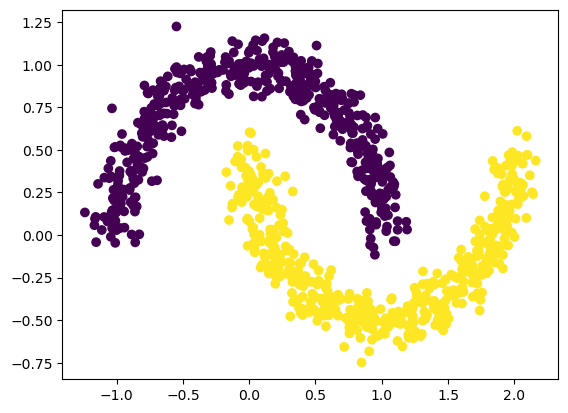

In [66]:
plt.scatter(x[:,0], x[:,1], c=y)

In [67]:
hidden_array = DNN_HIDDEN_UNITS_DEFAULT.split(",")
model = MLP(2, hidden_array, 2)

In [68]:
def accuracy(predictions, targets):
    total = predictions.shape[0]
    predictions = np.where(predictions > 0.5, 1, 0)
    acc_cnt = np.sum(predictions * targets)
    return acc_cnt / total

In [69]:
epoch_set = []
loss_set = []
acc_set = []
acc_train = 0.
acc_test = 0.
acc_test_set = []

这个train()和train_mlp_numpy.py中的一样

使用 mini-batch：修改SGD中的 idxs = np.random.randint(0, x_input_train.shape[0] , size=1) 中的size

In [70]:
def train(para):
    if para == 'BGD':
        for turn in range(MAX_EPOCHS_DEFAULT):
            pre = model.forward(x_input_train)
            _, loss = CrossEntropy().forward(pre, y_onehot_train)
            loss_avg = np.mean(loss, axis=0)[0]
            acc_train = accuracy(pre, y_onehot_train)
            dout = CrossEntropy().backward(pre, y_onehot_train)
            model.backward(dout)
            if turn > 0 and turn % EVAL_FREQ_DEFAULT == 0:
                pre_test = model.forward(x_input_test)
                acc_test = accuracy(pre_test, y_onehot_test)
                
                epoch_set.append(turn)
                loss_set.append(loss_avg)
                acc_set.append(acc_train)
                acc_test_set.append(acc_test)
                print("The ", turn, " BGD training turn, loss is: ", loss_avg, "accuracy is: ", acc_train)
                print("train accuracy: ", acc_set[-1], "test accuracy: ", acc_test)
    if para == 'SGD':
        for turn in range(MAX_EPOCHS_DEFAULT):
            idxs = np.random.randint(0, x_input_train.shape[0] , size=100)
            tmp_X = x_input_train.take(idxs,axis=0)
            tmp_Y = y_onehot_train.take(idxs,axis=0)
            
            pre = model.forward(tmp_X)
            _, loss = CrossEntropy().forward(pre, tmp_Y)
            loss_avg = np.mean(loss, axis=0)[0]
            acc_train = accuracy(pre, tmp_Y)
            dout = CrossEntropy().backward(pre, tmp_Y)
            model.backward(dout)
            if turn > 0 and turn % EVAL_FREQ_DEFAULT == 0:
                pre_test = model.forward(x_input_test)
                acc_test = accuracy(pre_test, y_onehot_test)
                
                epoch_set.append(turn)
                loss_set.append(loss_avg)
                acc_set.append(acc_train)
                acc_test_set.append(acc_test)
                print("The ", turn, " SGD training turn, loss is: ", loss_avg, "accuracy is: ", acc_train)
                print("train accuracy: ", acc_set[-1], "test accuracy: ", acc_test)

### 使用BDG：train("BDG") 使用SDG：train("SDG")

In [71]:
train("BGD")

The  10  BGD training turn, loss is:  0.6931441994580168 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  20  BGD training turn, loss is:  0.6931414299825847 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  30  BGD training turn, loss is:  0.69313888123211 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  40  BGD training turn, loss is:  0.6931365430247144 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  50  BGD training turn, loss is:  0.6931344219548524 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  60  BGD training turn, loss is:  0.6931324956621111 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  70  BGD training turn, loss is:  0.693130735160235 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.485
The  80  BGD training turn, loss is:  0.693129111635781 accuracy is:  0.50375
train accuracy:  0.50375 test accuracy:  0.

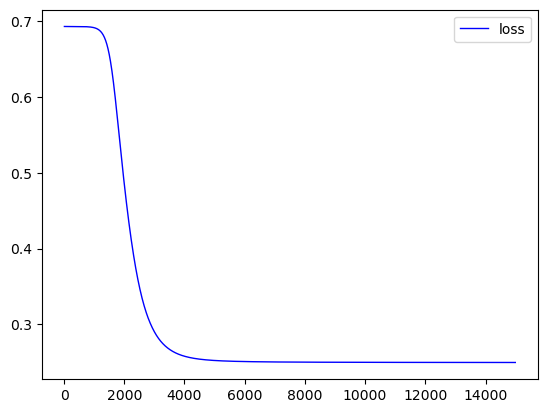

In [72]:
plt.plot(epoch_set, loss_set, linewidth=1, color="blue",label="loss")
plt.legend()

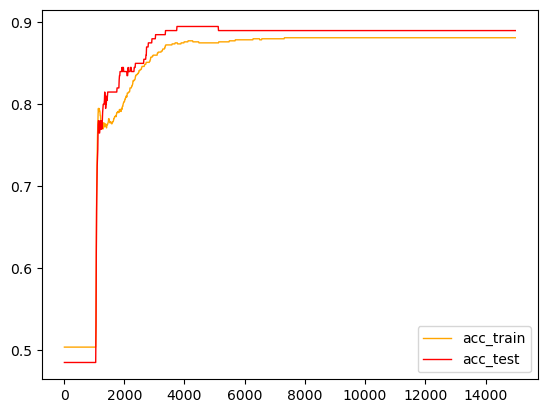

In [76]:
plt.plot(epoch_set, acc_set, linewidth=1, color="orange",label="acc_train")
plt.plot(epoch_set, acc_test_set, linewidth=1, color="red",label="acc_test")
plt.legend()

最后的test accuracy rate

In [75]:
pre = model.forward(x_input_test)
acc_test = accuracy(pre, y_onehot_test)
print("train accuracy: ", acc_set[-1], "test accuracy: ", acc_test)

train accuracy:  0.88125 test accuracy:  0.89
